In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers 
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset1",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 500 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['bercak daun', 'busuk daun', 'sawi sehat']

In [6]:
len(dataset)

16

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[2 0 0 2 0 0 0 0 0 2 2 2 0 0 2 0 0 0 2 0 2 2 0 1 2 0 2 0 2 0 1 2]


In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[ 77.  74.  31.]
  [ 67.  64.  21.]
  [ 66.  63.  22.]
  ...
  [133. 179.  28.]
  [129. 175.  25.]
  [127. 173.  23.]]

 [[ 81.  78.  35.]
  [ 77.  74.  31.]
  [ 72.  69.  26.]
  ...
  [127. 173.  22.]
  [125. 171.  21.]
  [125. 171.  21.]]

 [[ 85.  81.  36.]
  [ 83.  79.  34.]
  [ 82.  78.  33.]
  ...
  [125. 171.  21.]
  [124. 170.  22.]
  [124. 170.  22.]]

 ...

 [[ 92.  77.  36.]
  [ 87.  72.  31.]
  [ 87.  73.  34.]
  ...
  [ 72. 134.  27.]
  [ 73. 135.  26.]
  [ 73. 135.  24.]]

 [[ 97.  82.  39.]
  [ 88.  73.  30.]
  [ 87.  72.  31.]
  ...
  [ 71. 133.  26.]
  [ 75. 134.  28.]
  [ 76. 135.  27.]]

 [[ 93.  79.  34.]
  [ 91.  77.  32.]
  [ 91.  76.  33.]
  ...
  [ 68. 130.  23.]
  [ 73. 132.  26.]
  [ 72. 131.  25.]]]


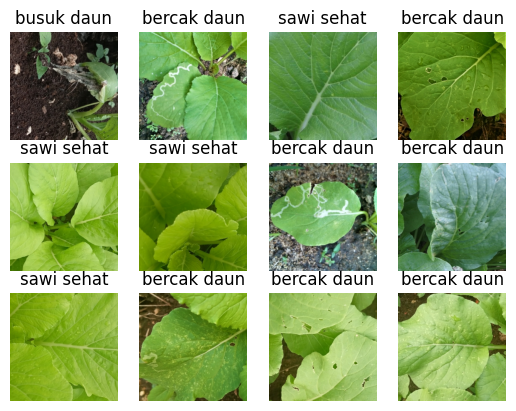

In [9]:
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [10]:
len(dataset)

16

In [11]:
train_size = 0.8
len(dataset)*train_size 

12.8

In [12]:
train_ds= dataset.take(12)
len(train_ds)

12

In [13]:
test_ds = dataset.skip(12)
len(test_ds)

4

In [14]:
val_size=0.1
len(dataset)*val_size

1.6

In [15]:
val_ds = test_ds.take(1)
len(val_ds)

1

In [16]:
test_ds = dataset.skip(1)
len(test_ds)

15

In [17]:
def get_dataset_partitions_tf(ds, train_split=0.5, val_split=0.1, test_split=0.1, shuffle=True,shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=5)
    
    train_size = int(train_split * ds_size)
    val_size= int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [18]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [19]:
len(train_ds)

12

In [20]:
len(val_ds)

1

In [21]:
len(test_ds)

3

In [22]:
train_ds = train_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [24]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [25]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation= 'softmax')
])

model.build(input_shape=input_shape)

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [27]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [28]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
12/12 [==============================] - 43s 3s/step - loss: 1.0205 - accuracy: 0.4401 - val_loss: 0.9855 - val_accuracy: 0.3750
Epoch 2/50
12/12 [==============================] - 28s 2s/step - loss: 0.9403 - accuracy: 0.4688 - val_loss: 0.9483 - val_accuracy: 0.5312
Epoch 3/50
12/12 [==============================] - 27s 2s/step - loss: 0.9228 - accuracy: 0.4740 - val_loss: 0.8842 - val_accuracy: 0.4375
Epoch 4/50
12/12 [==============================] - 27s 2s/step - loss: 0.8929 - accuracy: 0.5130 - val_loss: 0.8318 - val_accuracy: 0.6875
Epoch 5/50
12/12 [==============================] - 27s 2s/step - loss: 0.8399 - accuracy: 0.6094 - val_loss: 0.7484 - val_accuracy: 0.7188
Epoch 6/50
12/12 [==============================] - 27s 2s/step - loss: 0.7013 - accuracy: 0.6797 - val_loss: 0.6761 - val_accuracy: 0.7188
Epoch 7/50
12/12 [==============================] - 28s 2s/step - loss: 0.5751 - accuracy: 0.7734 - val_loss: 0.5755 - val_accuracy: 0.8438
Epoch 8/50
12/12 [==

In [29]:
scores = model.evaluate(test_ds)

3/3 [==============================] - 8s 566ms/step - loss: 0.2034 - accuracy: 0.9271


In [30]:
scores

[0.20340992510318756, 0.9270833134651184]

In [31]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 12}

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and vallidation Loss')

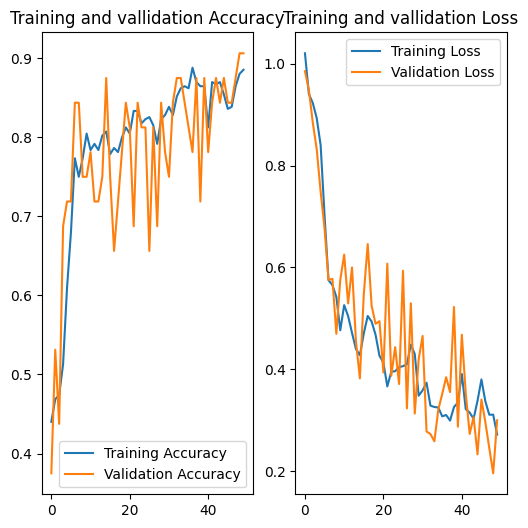

In [34]:
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and vallidation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and vallidation Loss')


first image to predict
actual label: bercak daun
1/1 [==============================] - 1s 906ms/step
Predicted Label: bercak daun


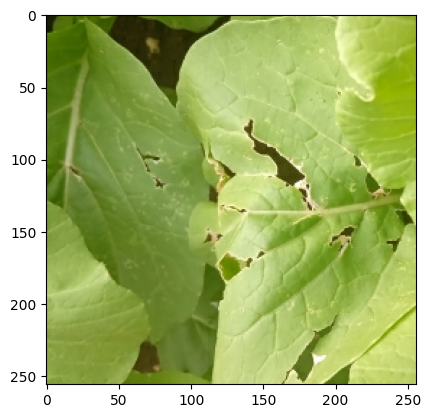

In [35]:
import numpy as np 
for images_batch, label_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [36]:
np.argmax([0.7677009, 0.0033513, 0.22894777])

0

In [37]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #membuat batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 31ms/step


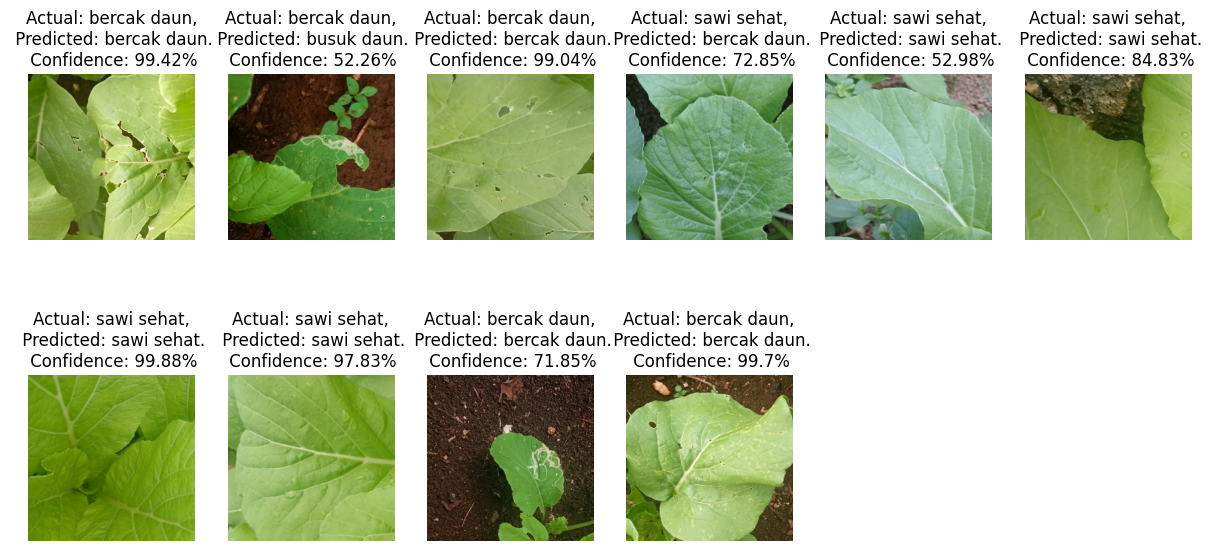

In [43]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(10):
        ax = plt.subplot(4, 6,i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [39]:
model_version=2
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/2\assets


INFO:tensorflow:Assets written to: models/2\assets
